<h2><center> FACIAL RECOGNITION OF DOWN SYNDROME IN CHILDREN</h2></center>
<figure>
<center><img src ="https://upload.wikimedia.org/wikipedia/commons/0/03/Boy_with_Down_Syndrome.JPG" width = "800" height = '500'/>


*About the problem*
> Down syndrome is a genetic disorder and results from having an extra copy of the 21st chromosome. In this case, the sum of the chromosomes, which is normally 46, increases to 47. This extra genetic material causes the physical and developmental characteristics associated with Down syndrome. Down syndrome occurs on average in every 800 births. There are around 6 million individuals with Down syndrome all over the world.

> Physical characteristics of individuals with Down syndrome may include a flat facial profile, small head, short neck, almond-shaped eyes, and protruding tongue. Individuals with Down syndrome may be short and overweight. There may be a degree of intellectual disability, which can range from mild to moderate.

> Down syndrome can also cause certain health problems such as heart disease, hearing loss, vision problems and thyroid problems.

> With these difficulties, people with Down syndrome can make a living. They can go to school, work at work, and build relationships. With the appropriate education, support, and availability, people with Down syndrome can fulfill their potential.

*Objective of this challenge*
> Since Down syndrome is not such a rare condition, increasing detection rates are beneficial for society in many ways. For this reason, we have choosen to use Artificial intelligence to help detect them via cameras so they can further be giving a top priority in a disadvantage environment.
    
*About dataset*
> The dataset consists of 1500 photographs(data point) of children with down syndrome and 1500 healthy children. Things put into consideration:

- Age groups: Although the word child covers the age range of 0-18, photographs of children aged 0-15 were used mostly because there is no age information in many data and it is difficult to determine the age of individuals with Down syndrome.

- Glasses: It can also cause vision problems with Down syndrome. This is a high rate. That's why many children with down syndrome wear glasses. However, in order that this situation does not have an effect on the decision structure of the model we will train, photographs of children with Down syndrome with glasses, photographs of children with Down syndrome without glasses, photographs of healthy children with glasses and photographs of healthy children without glasses were tried to be balanced.

- Skin color: Since skin color is not a determining factor for Down syndrome, balanced photographs of many skin colors were tried to be used in the data set.
- Eye color: Since eye color is not a determining factor for Down syndrome, balanced photographs of many skin colors were tried to be used in the data set.
- Hair: Since the hair color, shape and condition of the hair are not a determining feature for Down syndrome, it was tried to be kept in a balanced way.
    
Link to Dataset: https://www.kaggle.com/datasets/mervecayli/detection-of-down-syndrome-in-children/data

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px; color: white; display: fill; background-color: purple; border-radius: 5px; font-size: 150%"><b> Table of content </b></h1>


1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Feature Extraction](#Pipeline)
4. [Data Visualization](#EDA)
5. [Data Preprocessing](#Preprocess)
6. [Model Building](#model)
7. [Model Evaluation](#evaluate)
8. [Saving Model](#save)

<a name="Libraries"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:purple; border-radius:5px; font-size:100%"> <b>1. Importing libraries</b>

In [66]:
import os  # Provides functions for interacting with the operating system
import cv2  # OpenCV library for image and video processing
import torch  # PyTorch library for deep learning
import imghdr  # Used to determine the type of image contained in a file
import torchvision  # PyTorch library for vision-related tasks
import numpy as np  # Fundamental package for scientific computing with Python
import pandas as pd  # Data manipulation and analysis library
import tensorflow as tf  # TensorFlow library for deep learning
import matplotlib.pyplot as plt  # Plotting library for creating static, animated, and interactive visualizations
from tensorflow.keras import layers  # Core Keras layers API
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.optimizers import RMSprop  # RMSprop optimizer
from tensorflow.keras.applications import VGG16 # Import pre-trained VGG16 model for feature extraction
from tensorflow.keras.applications.vgg16 import preprocess_input # Function to preprocess input images for VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for image data
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  # Metrics for model evaluation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  # Core layers for building CNN models

<a name="Data"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:purple; border-radius:5px; font-size:100%"> <b>2. Loading data</b>

In [3]:
#loading our dataset
data_dir = r'C:\Users\ADMIN\Documents\ComputerVision_Projects\Down_syndrome\Image'

In [45]:
#checking our dataset
os.listdir(os.path.join(data_dir,'downSyndrome'))

['down_1.jpg',
 'down_10.jpg',
 'down_100.jpg',
 'down_1000.jpg',
 'down_1001.jpg',
 'down_1002.jpg',
 'down_1003.jpg',
 'down_1004.jpg',
 'down_1005.jpg',
 'down_1006.jpg',
 'down_1007.jpg',
 'down_1008.jpg',
 'down_1009.jpg',
 'down_101.jpg',
 'down_1010.jpg',
 'down_1011.jpg',
 'down_1012.jpg',
 'down_1013.jpg',
 'down_1014.jpg',
 'down_1015.jpg',
 'down_1016.jpg',
 'down_1017.jpg',
 'down_1018.jpg',
 'down_1019.jpg',
 'down_102.jpg',
 'down_1020.jpg',
 'down_1021.jpg',
 'down_1022.jpg',
 'down_1023.jpg',
 'down_1024.jpg',
 'down_1025.jpg',
 'down_1026.jpg',
 'down_1027.jpg',
 'down_1028.jpg',
 'down_1029.jpg',
 'down_103.jpg',
 'down_1030.jpg',
 'down_1031.jpg',
 'down_1032.jpg',
 'down_1033.jpg',
 'down_1034.jpg',
 'down_1035.jpg',
 'down_1036.jpg',
 'down_1037.jpg',
 'down_1038.jpg',
 'down_1039.jpg',
 'down_104.jpg',
 'down_1040.jpg',
 'down_1041.jpg',
 'down_1042.jpg',
 'down_1043.jpg',
 'down_1044.jpg',
 'down_1045.jpg',
 'down_1046.jpg',
 'down_1047.jpg',
 'down_1048.jpg',
 '

<a name="Pipeline"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:purple; border-radius:5px; font-size:100%"> <b>3. Feature Extraction</b>
    

Feature extraction involves transforming raw data into features that can be used by a machine learning model. This is especially useful when dealing with high-dimensional data like images

In [50]:
#Building Data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2999 files belonging to 2 classes.


In [51]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [52]:
# Converting the dataset to an iterator
data_iterator = data.as_numpy_iterator()

In [53]:
# Acessing a batch from the Datapipeline
batch = data_iterator.next()
len(batch)

2

In [54]:
# Displaying the shape of the batch
batch[0].shape

(32, 256, 256, 3)

In [55]:
# Displaying the class labels
#Class 1 = Normal
#Class 0 = Down
batch[1]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [56]:
# Converting the features array into a DataFrame
df_features = pd.DataFrame(batch[1])
print(df_features)

    0
0   1
1   1
2   0
3   0
4   0
5   0
6   1
7   1
8   0
9   1
10  0
11  0
12  0
13  0
14  1
15  1
16  0
17  1
18  0
19  0
20  0
21  1
22  0
23  1
24  1
25  1
26  1
27  0
28  0
29  0
30  0
31  0


<a name="EDA"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:purple; border-radius:5px; font-size:100%"> <b>4. Data Visualization</b>
    

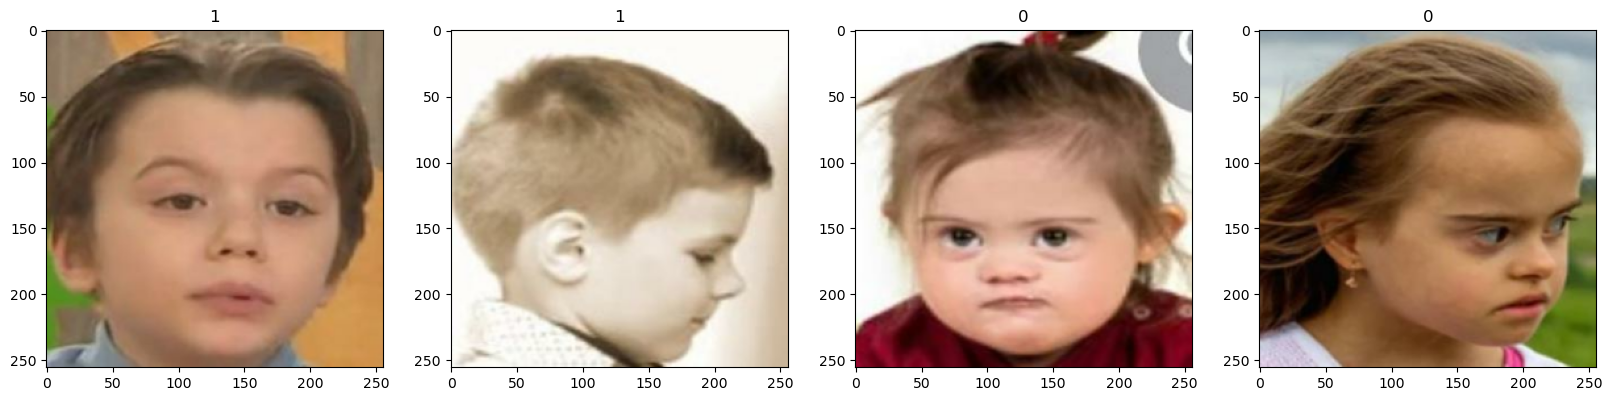

In [57]:
#Data visualization
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

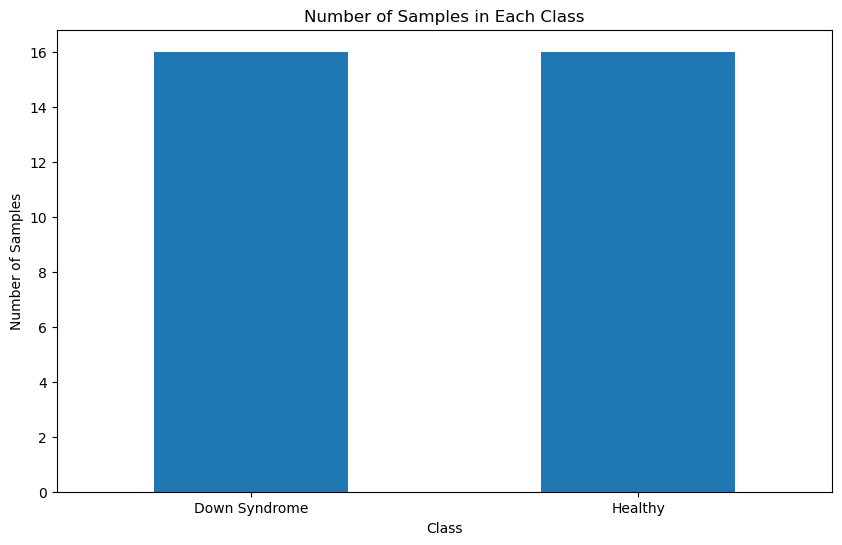

In [47]:
# Converting the features array into a DataFrame
df_features = pd.DataFrame(batch[1], columns=['Class'])

# Counting the number of samples in each class
class_counts = df_features['Class'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Number of Samples in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['Down Syndrome', 'Healthy'], rotation=0)
plt.show()

- We have a balanced dataset.

<a name="Preprocessing"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:purple; border-radius:5px; font-size:100%"> <b>5. Data Preprocessing</b>

Data preprocessing is an important step in preparing raw data for machine learning models. It involves transforming data into a clean, normalized format that improves model performance and generalization.

### Data Scaling
Scaling involves normalizing the pixel values of images to a common range, typically [0, 1]. This helps in ensuring that the model's learning is stable and efficient. So we will be setting our raw pixel values range from 0 to 255, as large input values can cause the model's weights to update unevenly, making the learning process unstable. Normalizing the data helps in speeding up convergence and achieving better performance.

In [58]:
#Data scaling
data = data.map(lambda x, y: (x / 255.0, y))  # Scale images to [0, 1]

In [59]:
# Verifying scaling
print(data.as_numpy_iterator().next()[0].min())  # Should print 0.0

0.0


### Data Splitting
Data Splitting involve splitting the dataset into training, validation, and test sets.
- Training Set: Used to train the model.
- Validation Set: Used to tune hyperparameters and evaluate the model's performance during training.
- Test Set: Used to evaluate the final model's performance on unseen data.

In [60]:
#Checking lenght of dataset
len(data)

94

In [61]:
#Data splitting
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [62]:
#train data size
train_size

65

In [63]:
#validation data size
val_size

18

In [64]:
## test data size
test_size

9

In [65]:
#Assigning suitable variable names
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<a name="model"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:purple; border-radius:5px; font-size:100%"> <b>6. Model Building</b>

## CNN  model
Convolutional Neural Networks (CNNs) are particularly well-suited for facial recognition tasks due to several key attributes that make them effective in handling image data. Here are some reasons why we choose CNNs for our facial recognition project:

*Hierarchical Feature Learning:*
> CNNs automatically extract hierarchical features from raw images. Early layers detect basic features like edges, while deeper layers identify complex patterns such as facial structures. This layered approach is essential for distinguishing subtle differences between faces.

*Spatial Invariance:*
>CNNs apply filters across the image to detect features regardless of their position. This property helps in recognizing faces even when they appear in different locations or orientations.

*Parameter Sharing:*
> CNNs use the same filters across the image, significantly reducing the number of parameters compared to fully connected networks. This makes the model more efficient and less prone to overfitting.

*Local Connectivity:*
>By focusing on small, local regions of the image, CNNs capture fine-grained details essential for distinguishing facial features.

*Handling High-Dimensional Data:*
> CNNs effectively manage the high-dimensional nature of image data. Convolutional and pooling layers reduce dimensionality while preserving critical information, allowing for efficient processing of large images.

*Robustness to Variations:*
> CNNs can be trained to handle variations in lighting, expressions, and partial occlusions. Data augmentation techniques, like rotation and scaling during training, enhance this robustness.

*Transfer Learning:*
>Pre-trained CNN models, such as VGGFace and FaceNet, can be fine-tuned for specific tasks. These models leverage rich feature representations learned from large datasets, reducing the need for extensive computational resources and training time.

*Proven Success:*
>CNNs have demonstrated superior performance in facial recognition benchmarks and real-world applications, becoming the state-of-the-art approach with high accuracy and reliability in various scenarios, including security systems and consumer electronics.

In [21]:
# We Instantiate the Sequential model
CNN_model = Sequential()

# Adding the layers
CNN_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))  # Add a 2D convolutional layer with 16 filters, a 3x3 kernel, ReLU activation, and input shape
CNN_model.add(MaxPooling2D())  # Add a max pooling layer to reduce spatial dimensions

CNN_model.add(Conv2D(32, (3, 3), activation='relu'))  # Add another 2D convolutional layer with 32 filters and a 3x3 kernel
CNN_model.add(MaxPooling2D())  # Add a max pooling layer to further reduce spatial dimensions

CNN_model.add(Conv2D(16, (3, 3), activation='relu'))  # Add another 2D convolutional layer with 16 filters and a 3x3 kernel
CNN_model.add(MaxPooling2D())  # Add a max pooling layer to further reduce spatial dimensions

CNN_model.add(Flatten())  # Flatten the 3D output to 1D for the fully connected layers
CNN_model.add(Dense(256, activation='relu'))  # Add a fully connected (dense) layer with 256 units and ReLU activation
CNN_model.add(Dense(1, activation='sigmoid'))  # Add the output layer with a single unit and sigmoid activation for binary classification


In [22]:
# Compiling the model
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing a summary of the model architecture
CNN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [24]:
logdir = 'logs'  # Directory where TensorBoard logs will be saved
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  # Callback to log training process for TensorBoard

In [25]:
# Train the model with the profiler callback
history_1 = CNN_model.fit(train, epochs=20, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
65/65 [==============================] - 196s 3s/step - loss: 0.7025 - accuracy: 0.5736 - val_loss: 0.5978 - val_accuracy: 0.7205
Epoch 2/20
65/65 [==============================] - 181s 3s/step - loss: 0.5371 - accuracy: 0.7255 - val_loss: 0.4729 - val_accuracy: 0.7656
Epoch 3/20
65/65 [==============================] - 159s 2s/step - loss: 0.4929 - accuracy: 0.7606 - val_loss: 0.5289 - val_accuracy: 0.7413
Epoch 4/20
65/65 [==============================] - 204s 3s/step - loss: 0.4416 - accuracy: 0.7995 - val_loss: 0.4407 - val_accuracy: 0.7865
Epoch 5/20
65/65 [==============================] - 177s 3s/step - loss: 0.3881 - accuracy: 0.8197 - val_loss: 0.4504 - val_accuracy: 0.8021
Epoch 6/20
65/65 [==============================] - 164s 3s/step - loss: 0.3456 - accuracy: 0.8538 - val_loss: 0.4079 - val_accuracy: 0.8194
Epoch 7/20
65/65 [==============================] - 188s 3s/step - loss: 0.3132 - accuracy: 0.8625 - val_loss: 0.5296 - val_accuracy: 0.7569
Epoch 8/20
65

*Insights*
- The training accuracy consistently increased, reaching very high levels by the end of the training (over 99%).
- The validation accuracy showed improvement, generally stabilizing above 80% after the initial epochs.
- While the training loss continued to decrease, the validation loss showed a trend of increase in the later epochs, suggesting potential overfitting.
- The highest validation accuracy achieved was around 86.11% at epoch 17.

The information above suggests that the model is learning well but might benefit from regularization techniques to improve generalization and reduce overfitting.

### Plot Performance

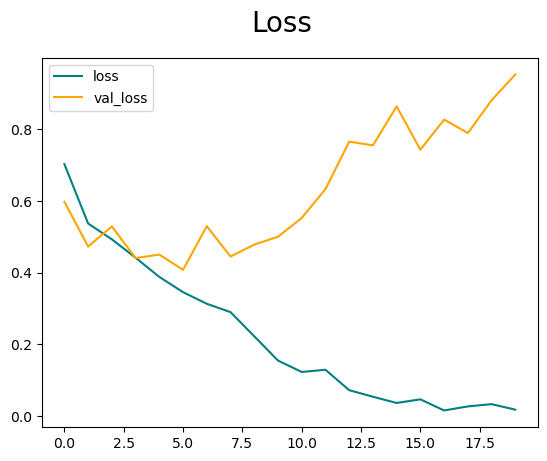

In [26]:
fig = plt.figure()
plt.plot(history_1.history['loss'], color='teal', label='loss')
plt.plot(history_1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

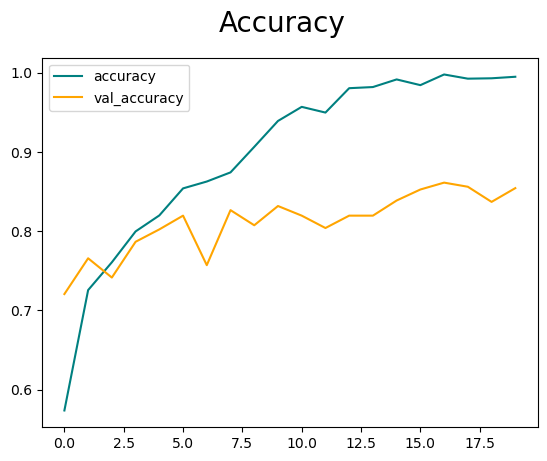

In [27]:
fig = plt.figure()
plt.plot(history_1.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<a name="evaluate"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:purple; border-radius:5px; font-size:100%"> <b>7. Model Evaluation</b>

### Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = CNN_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 996ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.86178863, shape=(), dtype=float32) tf.Tensor(0.7210884, shape=(), dtype=float32) tf.Tensor(0.7986111, shape=(), dtype=float32)


In [33]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.8617886304855347, Recall:0.7210884094238281, Accuracy: 0.7986111044883728


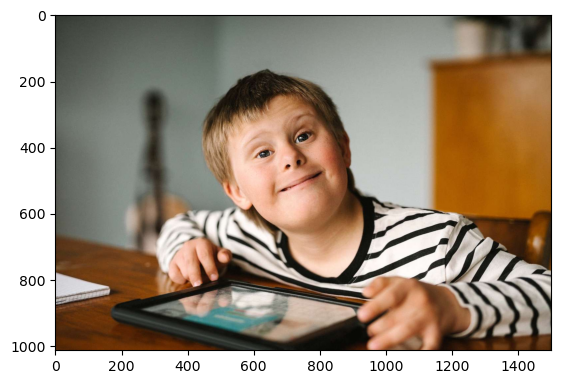

In [34]:
img = cv2.imread(r'C:\Users\ADMIN\Downloads\syndrome1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

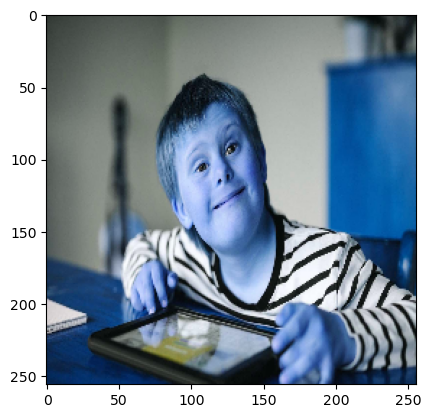

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
resize.shape

TensorShape([256, 256, 3])

In [37]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [39]:
yhat_1 = CNN_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 903ms/step


In [40]:
yhat_1

array([[3.0034006e-18]], dtype=float32)

In [42]:
if yhat_1 > 0.5: 
    print(f'Predicted class is Healthy')
else:
    print(f'Predicted class is a Down syndrome patient')

Predicted class is a Down syndrome patient



- If yhat_1 is greater than 0.5, the model predicts the class as 'Healthy'.
- If yhat_1 is less than or equal to 0.5, the model predicts the class as 'a Down syndrome patient'.

Conclusion:
- The model's prediction (yhat_1) is a very small value (close to zero), which is less than 0.5.
- Therefore, according to the conditional logic provided, the model predicts that the patient has Down syndrome.
- This shows our model has learnt well

<a name="#save"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:purple; border-radius:5px; font-size:100%"> <b>8.  Saving Model</b>

In [43]:
import joblib

In [44]:
# Save the stacking model to a file
model_filename = 'down_syndrom_CNN.pkl'
joblib.dump(CNN_model, model_filename)
print(f"CNN model saved as '{model_filename}'")


CNN model saved as 'down_syndrom_CNN.pkl'
